In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [2]:
data = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
x_train = x_train.reshape(len(x_train), 28* 28)
x_test = x_test.reshape(len(x_test), 28*28)

In [5]:
y_train.reshape(len(y_train), 1)

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [7]:
model = Sequential([
    tf.keras.layers.Input(shape = (784,)),
    Dense(units = 56, activation = "relu"),
    Dense(units = 28, activation = "relu"),
    Dense(units = 10, activation = "softmax")
])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"])

model.summary()

In [8]:
model.fit(x_train, y_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4505 - accuracy: 0.8785
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9368
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1561 - accuracy: 0.9536
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1256 - accuracy: 0.9616
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1040 - accuracy: 0.9684
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9732
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0774 - accuracy: 0.9762
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0674 - accuracy: 0.9795
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.053

In [9]:
model.save("DigitsRecognizer")

INFO:tensorflow:Assets written to: DigitsRecognizer\assets


INFO:tensorflow:Assets written to: DigitsRecognizer\assets


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9742


[0.09351564198732376, 0.9742000102996826]

In [11]:
pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


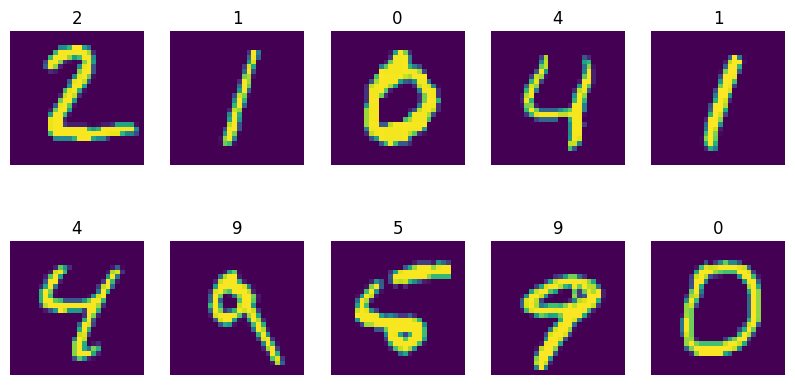

In [12]:
fig = plt.figure(figsize= (10, 5))
rows = 2
columns = 5
cnt = 1;
for i in range(10):
    fig.add_subplot(rows, columns, cnt)
    ans = np.argmax(pred[cnt])
    plt.imshow(x_test[cnt].reshape(28,28))
    plt.axis("off")
    plt.title(str(ans))
    cnt += 1

# Handwritten Digit

1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, '3')

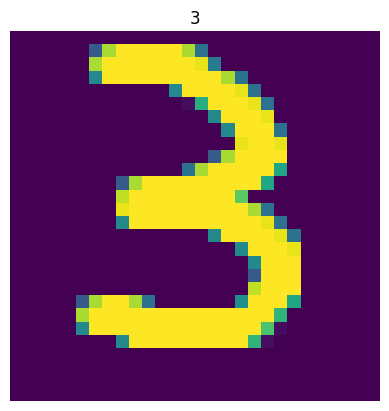

In [28]:
import cv2
img = cv2.imread("ima.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgdata = tf.keras.utils.normalize(img)
imgdata = imgdata.reshape(1, 28*28)
pred = model.predict(imgdata)
plt.imshow(img)
plt.axis("off")
plt.title(str(np.argmax(pred)))